<!--HEADER-->
[*Guia de aulas da disciplina de Modelagem Matemática*](https://github.com/rmsrosa/modelagem_matematica) *do* [*IM-UFRJ*](https://www.im.ufrj.br).

<!--NAVIGATOR-->

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/master/aulas/06.00-Aula6.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
&nbsp;
<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/master?filepath=aulas/06.00-Aula6.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;
<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/master/aulas/06.00-Aula6.slides.html"><img align="left" src="https://rmsrosa.github.io/jupyterbookmaker/badges/slides_badge.svg" alt="Open slides" title="Open and View Slides"></a>
&nbsp;

[<- Aula 5: Incerteza e intervalos e graus de confiança](05.00-Aula5.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Aula 7: Otimização e regressão não-linear ->](07.00-Aula7.ipynb)

---


# Aula 6: Regressão semi-linear, ajustes de ordem mais alta e critérios de seleção do ajuste

### Objetivos

- Estender o ajuste para curvas não-polinomiais, e.g.
    - $y=Ae^{kx}$; 
    - $y=Ax^p$;    
    - $y=\frac{\displaystyle ax}{\displaystyle b + x}$.

- Discussão sobre ganho dos ajustes em função do número de parâmetros da curva.

- Critérios de escolha do ajuste:
    - AIC: Critério de informação de Akaike *(Akaike information criterion)*
    - BIC: Critério de informação Bayesiano *(Bayesian information criterion)*

- Referências:
    - Capítulo 2 do livro "Mathematics for the Life Sciences", Springer, 2013, autor G. Ledder.
    - ["An Introduction to Statistical Learning" de G. James, D. Witten, T. Hastie, R. Tibshirani, Springer-Verlag](http://www-bcf.usc.edu/~gareth/ISL/getbook.html)

## Importando bibliotecas e definindo funções a serem usadas abaixo

In [1]:
from os import path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import io, base64
from IPython.display import Image, HTML

def path_files_aula2(filename):
    return path.join('..', 'dados', 'agua', filename)

def path_files_aula6(filename):
    return path.join('..', 'dados', 'ajustes', filename)

## Relembrando regressão linear

Usamos minimos quadrados para ajustar uma curva linear $y=ax + b$ a uma série de dados. Por exemplo, consideramos os dados sintéticos

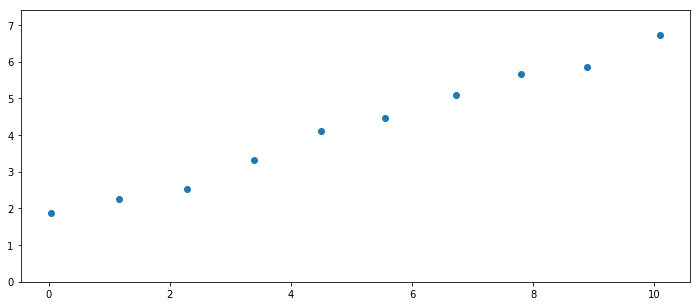

In [2]:
num_points, a, b = 10, 0.5, 1.2
x = np.linspace(0,10,num_points) + 0.1*np.random.rand(num_points)
y = b*x**0 + a*x + np.random.rand(num_points)
plt.figure(figsize=(12,5))
plt.ylim(0, 1.1*max(y))
plt.plot(x, y, 'o')
plt.show()

### Usando mínimos quadrados

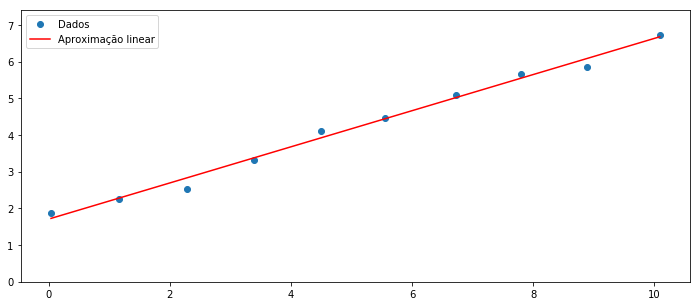

In [3]:
A = np.vstack([x,np.ones(num_points)]).T
m1, c1 = np.linalg.lstsq(A, y, rcond=None)[0]
plt.figure(figsize=(12,5))
plt.ylim(0, 1.1*max(y))
plt.plot(x, y, 'o', label='Dados')
plt.plot(x, m1*x + c1, 'r', label='Aproximação linear')
plt.legend()
plt.show()

### Regressão linear com polinômios

- É sempre bom realçar que o termo "linear" em "regressão linear" se refere à linearidade nos parâmetros do ajuste, não à curva. Ou seja, um ajuste aos dados de uma polinômio $y=a_mx^m + \ldots a_1 x + a_0$ ainda é regressão linear pois as incógnitas do ajuste são os coeficientes $a_0, \ldots, a_m$ e eles aparecem na curva de forma linear.

- Por exemplo, lembrem que fizemos, na [Aula 1](01.00-Aula1.ipynb), uma regressão linear ao ajustarmos uma curva quadrática aos dados da variação de densidade da água pura.

- Conforme vimos nessa mesma aula, a linearidade nos parâmetros nos permite usar ferramentas de álgebra linear, em particular o método de mínimos quadrados, para efetuar o ajuste de forma simples e rápida.

## Regressão semi-linear: ajuste de uma curva exponencial

- O ajuste de alguns outros tipos de curva pode ser transformado em um problema de regressão linear através de uma mudança de variáveis apropriada.

- Isso se aplica, por exemplo ao ajuste a dados $(x_i, y_i)$ por uma curva da forma exponencial ($k$ positivo ou negativo)

$$ y = A e^{kx}.
$$

- Observe que (para $y>0$), a curva pode ser escrita na forma

$$ \ln y = \ln (Ae^{kx}) =\ln A + k x.
$$

- Considerando uma nova variável $v = \ln y$ e um novo parâmetro $c=\ln A$, podemos escrever a curva na forma

$$ v = c + k x.
$$

- Assim, fazemos o ajuste dessa curva aos dados também transformados

$$(x_i, v_i) = (x_i, \ln y_i).$$

### Ajuste de uma curva de potência não inteira

- Outro exemplo é o de ajuste de curvas do tipo $y=A x^p$.

- Aplicando o logarítmo, temos

$$ \ln y = \ln (A e^{p\ln x}) = \ln A + p\ln x.
$$

- Fazendo a mudança de variáveis $u = \ln x$, $v =\ln y$ e um novo parâmetro $m=\ln A$, escrevemos a curva na forma

$$ v = c + ku.
$$

- Assim, fazemos o ajuste dessa curva aos dados também transformados

$$ (u_i, v_i) = (\ln x_i, \ln y_i).$$

### Ajuste de uma curva racional particular

- O ajuste de uma curva na forma 

$$ y=\frac{ax}{b + x}$$ 

pode ser transformada em um problema de regressão linear simplesmente trabalhando com o inverso da equação, i.e.

$$ \frac{1}{y} = \frac{b + x}{ax} = \frac{b}{a}\frac{1}{x} + \frac{1}{a},
$$

- Dessa forma, podemos ajustar a curva

$$ v = c + du, \qquad \text{nas variáveis} \qquad u = \frac{1}{x}, \;v=\frac{1}{y},
$$

a dados 

$$ (u_i, v_i) = \left(\frac{1}{x_i}, \frac{1}{y_i}\right).
$$

- Os parâmetros originais são obtidos de $c$ e $d$ por

$$ a = \frac{1}{c}, \qquad b = \frac{d}{c}.
$$


## Um exemplo: decaimento radioativo do Plutônio 241

- Para exempificar, vamos começar com o ajuste de uma curva de decaimento exponencial a dados de decaimento radioativo do Plutônio-241. 

- Vamos buscar um ajuste por uma curva exponencial da forma

$$ y = C e^{-k t}
$$

- Os dados foram extraídos (na verdade parte deles) do artigo 

    - R. Wellum, A. Verbruggen e R. Kessel, "A new evaluation of the half-life of ${}^{241}\texttt{Pu}$", *J. Anal. At. Spectrom.,* 2009, **24**, 801–807.


- Colocamos os dados no arquivo `decaimento_plutonio241.csv`. Como os dados não são puramente numéricos, usamos o `pandas` para ler os dados do arquivo.

### Lendo o arquivo

In [4]:
df = pd.read_csv(path_files_aula6('decaimento_plutonio241.csv'))
df

,data,R
0,1976-01-13,6.50660
1,1976-01-19,6.49650
2,1976-09-27,6.28570
3,1976-10-04,6.28200
4,1977-03-08,6.15260
5,1977-03-22,6.14350
6,1977-11-23,5.94060
7,1978-12-05,5.65990
8,1981-06-02,5.01330
9,1993-12-13,2.73870


### Os dados

- A primeira coluna indica a data em que os dados foram extraídos, no formado `ano-mês-dia`. 

- A segunda coluna indica a razão entre as razões das frações $n({}^{*}Pu)$ de cada isótopo (no material composto dos vários isótopos):

$$ R = \frac{\frac{\displaystyle n({}^{241}Pu)}{\displaystyle n({}^{240}Pu)}}{\frac{\displaystyle n({}^{240}Pu)}{\displaystyle n({}^{239}Pu)}}
$$

### Datas

Tratamos as datas para ter uma evolução em dias. Fazemos isso com módulo [time](https://docs.python.org/3/library/time.html).

In [5]:
import time

t0 = 0
dias, anos = list(), list()

anos = np.array([])
resultado = ""
for data in df["data"].values:
    t = tuple([int(num) for num in data.split('-')]+[0,0,0,0,0,0])
    if t0 == 0:
        t0 = time.mktime(t)
    anos = np.append(anos, (time.mktime(t)-t0)/60/60/24/365.25)
    resultado = resultado + f'Em {time.strftime("%a, %d %b %Y",t)}, transcorridos aproximadamente {anos[-1]:.3f} anos\n'

In [6]:
print(resultado)

Em Mon, 13 Jan 1976, transcorridos aproximadamente 0.000 anos
Em Mon, 19 Jan 1976, transcorridos aproximadamente 0.016 anos
Em Mon, 27 Sep 1976, transcorridos aproximadamente 0.706 anos
Em Mon, 04 Oct 1976, transcorridos aproximadamente 0.726 anos
Em Mon, 08 Mar 1977, transcorridos aproximadamente 1.150 anos
Em Mon, 22 Mar 1977, transcorridos aproximadamente 1.188 anos
Em Mon, 23 Nov 1977, transcorridos aproximadamente 1.862 anos
Em Mon, 05 Dec 1978, transcorridos aproximadamente 2.894 anos
Em Mon, 02 Jun 1981, transcorridos aproximadamente 5.385 anos
Em Mon, 13 Dec 1993, transcorridos aproximadamente 17.916 anos
Em Mon, 25 Aug 1994, transcorridos aproximadamente 18.615 anos
Em Mon, 28 Oct 1996, transcorridos aproximadamente 20.791 anos
Em Mon, 13 Nov 2006, transcorridos aproximadamente 30.834 anos



### Gráfico dos dados

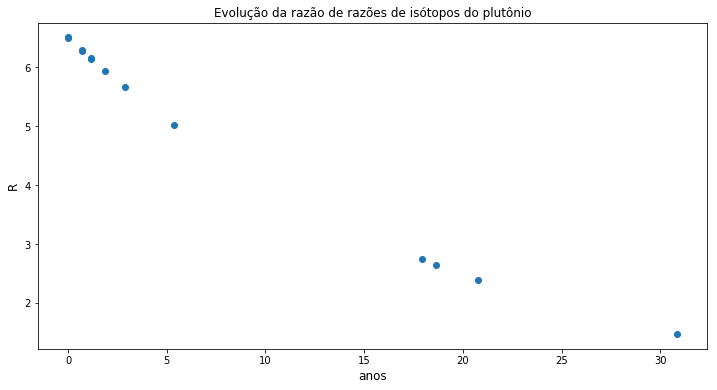

In [7]:
r = df['R'].values

plt.figure(figsize=(12,6))
plt.plot(anos, r, 'o')
plt.xlabel('anos', fontsize=12)
plt.ylabel('R', fontsize=12)
plt.title('Evolução da razão de razões de isótopos do plutônio')
plt.show()

### Gráfico com a ordenada em escala logarítmica

Observe a aparente linearidade dos dados ao usarmos uma escala logarítmica na ordenada, sugerindo um ajuste por uma curva exponencial.

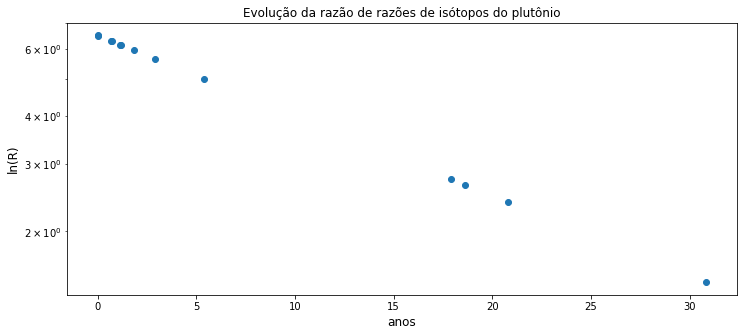

In [8]:
plt.figure(figsize=(12,5))
plt.plot(anos, r, 'o', 'blue'), plt.yscale('log')
plt.xlabel('anos', fontsize=12), plt.ylabel('ln(R)', fontsize=12)
plt.title('Evolução da razão de razões de isótopos do plutônio')
plt.show()

### Ajuste

In [9]:
s = np.log(r)

A = np.vstack([anos, anos**0]).T

lsq = np.linalg.lstsq(A, s, rcond=None)[0:2]
k, c = - lsq[0][0], lsq[0][1]
err = lsq[1][0]

print(f'Erro quadrático médio: {err:1.2e}')

Erro quadrático médio: 3.61e-06


### Gráfico do ajuste

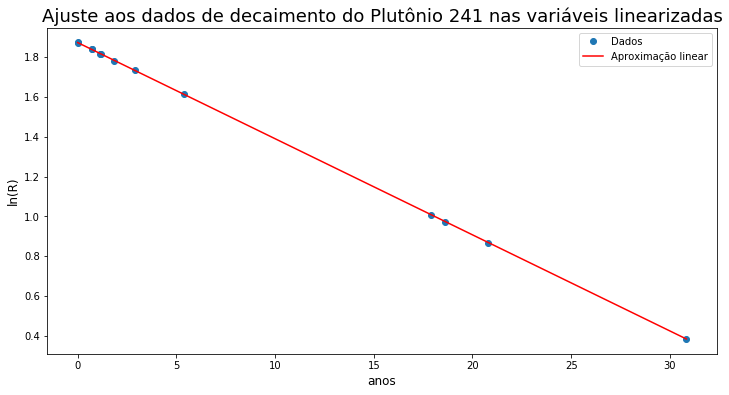

In [10]:
plt.figure(figsize=(12,6))
plt.plot(anos, s, 'o', label='Dados')
plt.plot(anos, -k*anos + c, 'r', label='Aproximação linear')
plt.legend()
plt.xlabel('anos', fontsize=12)
plt.ylabel('ln(R)', fontsize=12)
plt.title('Ajuste aos dados de decaimento do Plutônio 241 nas variáveis linearizadas', fontsize=18)
plt.show()

### Ajuste nas coordenadas originais

Primeiro obtemos o parâmetro nas coordenas originais e construímos a aproximação exponencial.

In [11]:
C = np.exp(c)

anos_ext = np.linspace(anos[0], anos[-1], 400)
y = C*np.exp(-k*anos_ext)

### Gráfico do ajuste exponencial

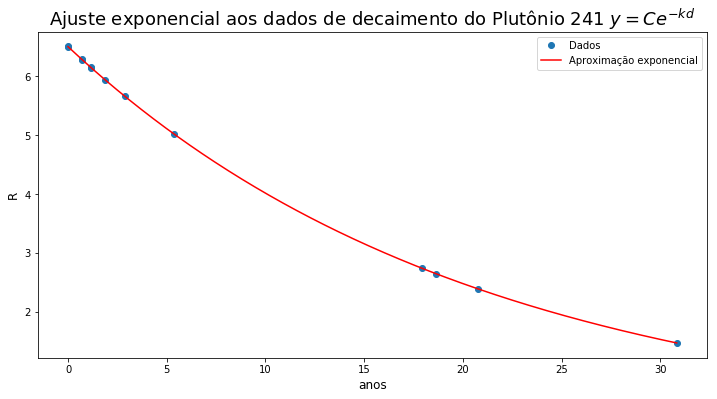

In [12]:
plt.figure(figsize=(12,6))
plt.plot(anos, r, 'o', label='Dados')
plt.plot(anos_ext, y, 'r', label='Aproximação exponencial')
plt.legend()
plt.xlabel('anos', fontsize=12)
plt.ylabel('R', fontsize=12)
plt.title(r'Ajuste exponencial aos dados de decaimento do Plutônio 241 $y = Ce^{-kd}$', fontsize=18)
plt.show()

### Meia-vida do Plutônio 241

Dado um decaimento exponencial 

$$ y(t) = Ce^{-kt}
$$

a meia-vida $t_{1/2}$ é dada pela equação 

$$ Ce^{-kt_{1/2}} = \frac{C}{2},
$$ 

ou seja

$$ t_{1/2} = \frac{1}{k}\ln 2.
$$

Assim, obtemos uma meia-vida para o Plutônio 241 da ordem de $14,374$ anos. 

**Observação:** Não usamos exatamente os mesmos dados e não usamos mínimos quadrados com peso, de forma que obtivemos uma meia-vida um pouco mais alta e, de fato, acima da margem de erro de $14.325 \pm 0.024$ anos do artigo.

In [13]:
print(f'{np.log(2)/k:.3f} anos')

14.374 anos


## Ajustes com mais parâmetros

Podemos continuar aumentando o número de parâmetros e a complexidade do modelo usado para o ajuste, mas é importante sabermos até que ponto devemos ir.

Podemos mencionar dois motivos para interromper a busca por ajustes melhores e fixar um determinado modelo de ajuste:

- Não há ganho significativo em termos da redução do erro quadrático médio;

- Mesmo com a redução do erro quadrático médio, o modelo não aproxima bem possíveis novos dados adicionados, prejudicando a capacidade de previsão do modelo.

Vamos começar vendo dois exemplos, cada um em uma dessas situações.

## Densidade da água pura 

Comecemos relembrando o ajuste da densidade da água pura e aumentando o grau do polinômio de ajuste

In [14]:
agua = np.loadtxt(open(path_files_aula2('water_properties_from_Batchelor.csv')), delimiter=",", skiprows=2)

x = agua[:,0]
A1 = np.vstack([x, x**0]).T
A2 = np.vstack([x**2, x, x**0]).T
A3 = np.vstack([x**3, x**2, x, x**0]).T
A4 = np.vstack([x**4, x**3, x**2, x, x**0]).T
A5 = np.vstack([x**5, x**4, x**3, x**2, x, x**0]).T
A6 = np.vstack([x**6, x**5, x**4, x**3, x**2, x, x**0]).T

y = agua[:,1]

a1 = np.linalg.lstsq(A1, y, rcond=None)[0]
a2 = np.linalg.lstsq(A2, y, rcond=None)[0]
a3 = np.linalg.lstsq(A3, y, rcond=None)[0]
a4 = np.linalg.lstsq(A4, y, rcond=None)[0]
a5 = np.linalg.lstsq(A5, y, rcond=None)[0]
a6 = np.linalg.lstsq(A6, y, rcond=None)[0]

### Ajuste quadrático e cúbico

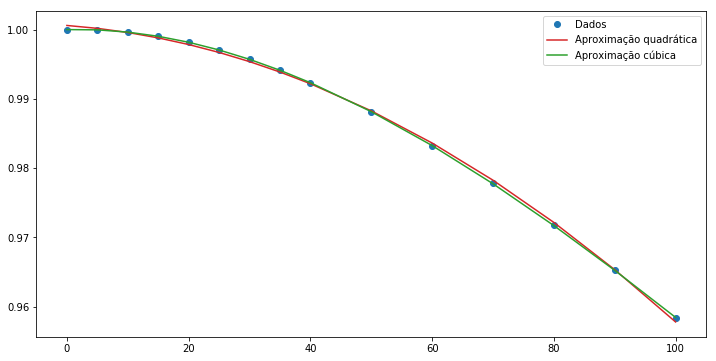

In [15]:
plt.figure(figsize=(12,6))
plt.plot(x, y, 'o', label='Dados')
plt.plot(x, a2[0]*x**2 + a2[1]*x + a2[2], 'tab:red', label='Aproximação quadrática')
plt.plot(x, a3[0]*x**3 + a3[1]*x**2 + a3[2]*x + a3[3], 'tab:green', label='Aproximação cúbica')
             
plt.legend()
plt.show()

### Ajuste cúbico e quártico

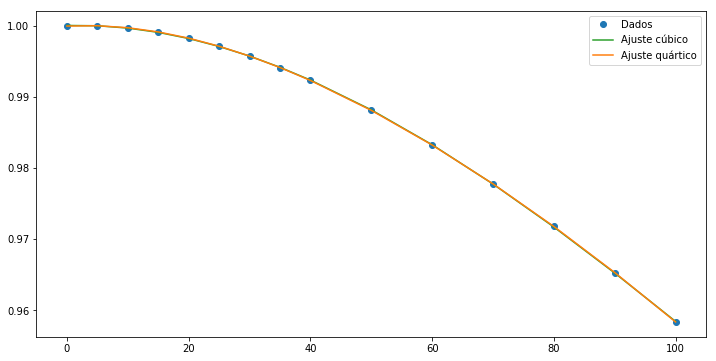

In [16]:
plt.figure(figsize=(12,6))
plt.plot(x, y, 'o', label='Dados')
plt.plot(x, a3[0]*x**3 + a3[1]*x**2 + a3[2]*x + a3[3], 'tab:green', label='Ajuste cúbico')
plt.plot(x, a4[0]*x**4 + a4[1]*x**3 + a4[2]*x**2 + a4[3]*x + a4[4], 'tab:orange', label='Ajuste quártico')
plt.legend()
plt.show()

### Evolução do erro quadrático

- Calculamos a soma do quadrado dos resíduos de cada aproximação. 

- O **resíduo** é a diferença 

$$\Delta_i = y(x_i) - y_i$$

entre o valor da ajuste $y(x_i)$ e o valor $y_i$ do dado, para cada abscissa $x_i$, das $N$ amostras $i=1, \ldots, N$.

- A **soma dos quadrado dos resíduos** é o total

$$ \Delta = \sum_i \Delta_i^2.
$$

- O **erro quadrático médio** toma a média dos $\Delta_i^2$:

$$ E = \frac{1}{N} \sum_i \Delta_i^2.
$$

### Erro quadrático médio de cada aproximação

In [17]:
N = len(x)

err = list()
err.append(np.linalg.lstsq(A1, y, rcond=None)[1][0]/N)
err.append(np.linalg.lstsq(A2, y, rcond=None)[1][0]/N)
err.append(np.linalg.lstsq(A3, y, rcond=None)[1][0]/N)
err.append(np.linalg.lstsq(A4, y, rcond=None)[1][0]/N)
err.append(np.linalg.lstsq(A5, y, rcond=None)[1][0]/N)
err.append(np.linalg.lstsq(A6, y, rcond=None)[1][0]/N)

print(f'Linear:     {err[0]:1.2e}')
print(f'Quadrática: {err[1]:1.2e}')
print(f'Cúbica:     {err[2]:1.2e}')
print(f'Quártica:   {err[3]:1.2e}')
print(f'Quíntica:   {err[4]:1.2e}')
print(f'Grau seis:  {err[5]:1.2e}')
print('\nSem ganho significativo a partir da quártica')

Linear:     9.22e-06
Quadrática: 1.33e-07
Cúbica:     3.16e-09
Quártica:   3.27e-10
Quíntica:   2.64e-10
Grau seis:  2.64e-10

Sem ganho significativo a partir da quártica


### Gráfico da evolução do erro quadrático médio

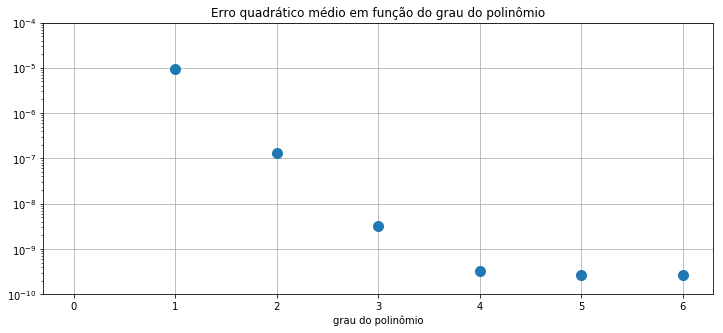

In [18]:
plt.figure(figsize=(12,5))

plt.plot(range(1,len(err)+1), err, 'o', 'r', markersize=10)
plt.grid(True)

plt.yscale('log')
plt.ylim(10**(-10), 10**(-4))
plt.title('Erro quadrático médio em função do grau do polinômio')
plt.xlabel('grau do polinômio')
plt.show()

### Erro relativo

- Observe que a densidade da água é em torno de $1 \,\texttt{g}/\texttt{cm}^3$ de modo que o **erro relativo** é essencialmente igual ao **erro absoluto** calculado acima (exceto pela ausência da unidade física). 

- Por outro lado, um fator relevante é que a densidade varia muito pouco em função da temperatura. 

- Nesse sentido, pode ser interessante, em determinadas situação, trabalhar com o erro relativo à essa variação. 

- A variação absoluta é da ordem de $0,04 \,\texttt{g}/\texttt{cm}^3$ (associada a uma variação relativa da ordem de $4\%$).

- Assim, o erro relativo à essa variação é em torno de duas ordens de grandeze menor do que o erro obtido anteriormente.

In [19]:
print(f'Variação: {(max(y) - min(y)):.4f} g/cm**3')

Variação: 0.0416 g/cm**3


## Taxa de crescimento de um predador fictício

- O arquivo `psteadius_pspeedius_vs_prey.csv`, no subdiretório `../dados/ajustes`, contém uma tabela com a taxa de crescimento de dois predadores fictícios *(P. steadius e P. Speedius)* em função da densidade da presa. 

- Observe que não é a evolução temporal da densidade da presa, mas, sim, a variação na taxa de crescimento de acordo com a densidade da presa.

- Esses dados sintéticos foram extraídos do Capítulo 2 do livro do G. Ledder.

- Vamos fazer um ajuste com parte dos dados e ver quanto a curva ajustada consegue aproximar os dados restantes.

### Carregando os dados

In [20]:
df = pd.read_csv(path_files_aula6('psteadius_pspeedius_vs_prey.csv'), header=[0,1])
df

,Prey density,P. steadius,P. speedius
,x,y,z
0,0,0,0
1,10,2,7
2,20,7,11
3,30,10,19
4,40,9,19
5,50,14,22
6,60,21,25
7,70,20,21
8,80,25,25


### Selecionando o P. steadius and visualizando o gráfico

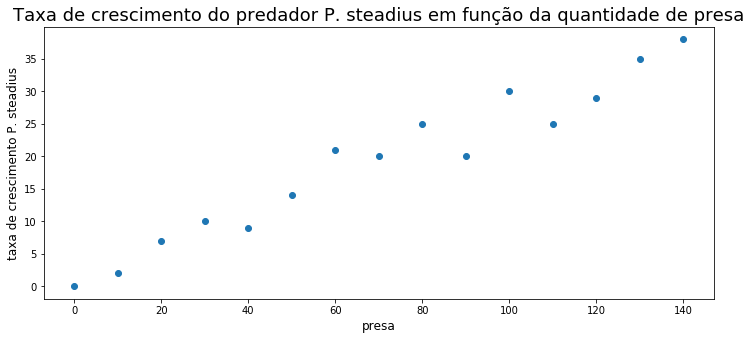

In [21]:
x, y = df['Prey density'].values, df['P. steadius'].values

plt.figure(figsize=(12,5))

plt.plot(x, y, 'o')
plt.xlabel('presa', fontsize=12)
plt.ylabel('taxa de crescimento P. steadius', fontsize=12)
plt.title('Taxa de crescimento do predador P. steadius em função da quantidade de presa', fontsize=18)
plt.show()

### Ajustando polinômios

In [22]:
x_sel = x[0::2]
y_sel = y[0::2]
J_sel = len(x_sel) - 1
A_sel = [np.hstack([x_sel**i for i in range(j, -1, -1)]) for j in range(J_sel)]
lsq_sel = [np.linalg.lstsq(A_sel[j], y_sel, rcond=None) for j in range(J_sel)]
a_sel = [lsq_sel[i][0] for i in range(J_sel)]
err_sel = list()
err_ext = list()
y_sel_ajuste = list()
y_ext_ajuste = list()
for j in range(J_sel):
    y_sel_ajuste.append(np.sum([a_sel[j][i]*x_sel**(j-i) for i in range(j+1)], axis=0))    
    if lsq_sel[j][1].size>0:
        err_sel.append(lsq_sel[j][1][0]/len(x_sel))
    else:
        err_sel.append(np.linalg.norm(y_sel_ajuste[j] - y)**2/len(x_sel)) 
    y_ext_ajuste.append(np.sum([a_sel[j][i]*x**(j-i) for i in range(j+1)], axis=0))
    err_ext.append(np.linalg.norm(y_ext_ajuste[j] - y)**2/len(x))

### Gráfico dos ajustes

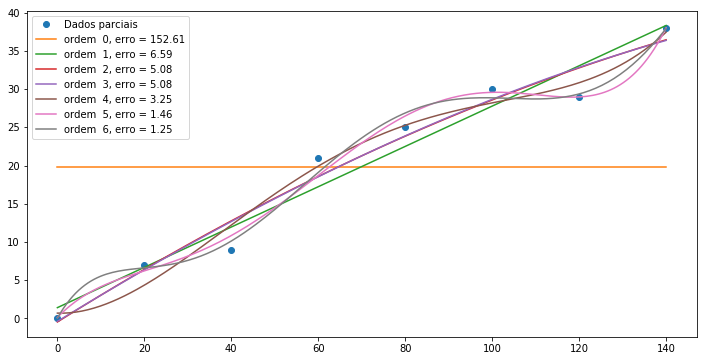

In [23]:
plt.figure(figsize=(12,6))
plt.plot(x_sel, y_sel, 'o', label='Dados parciais')
x_ref = np.linspace(x_sel[0], x_sel[-1], 200)
y_ref = list()
for j in range(J_sel):
    y_ref.append(np.sum([a_sel[j][i]*x_ref**(j-i) for i in range(j+1)], axis=0))    
    plt.plot(x_ref, y_ref[j], label=f'ordem  {j}, erro = {err_sel[j]:.2f}')

plt.legend()
plt.show()

### Gráfico da evolução do erro quadrático médio

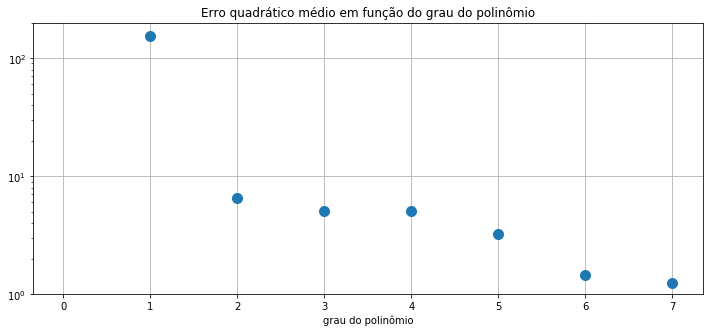

In [24]:
plt.figure(figsize=(12,5))

plt.plot(range(1,len(err_sel)+1), err_sel, 'o', 'r', markersize=10)
plt.grid(True)

plt.yscale('log')
plt.ylim(1, 200)
plt.title('Erro quadrático médio em função do grau do polinômio')
plt.xlabel('grau do polinômio')
plt.show()

### Incluindo todos os dados

Observe a piora nos erros.

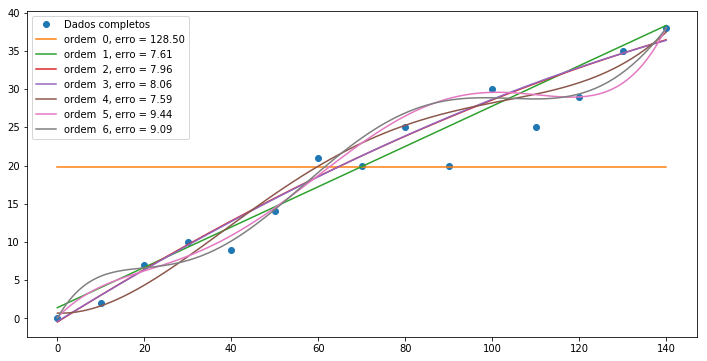

In [25]:
plt.figure(figsize=(12,6))
plt.plot(x, y, 'o', label='Dados completos')
for j in range(J_sel):
    plt.plot(x_ref, y_ref[j], label=f'ordem  {j}, erro = {err_ext[j]:.2f}')
plt.legend()
plt.show()

### Gráfico da evolução do erro quadrático médio

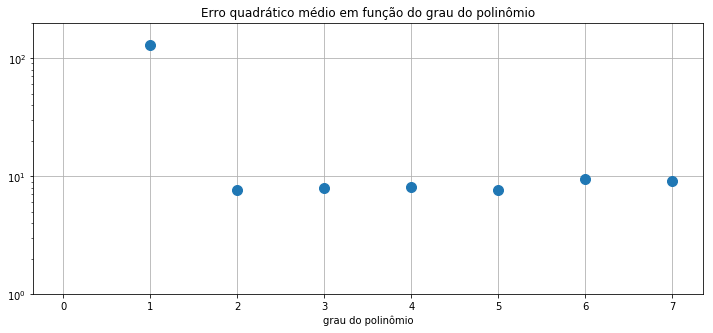

In [26]:
plt.figure(figsize=(12,5))

plt.plot(range(1,len(err_ext)+1), err_ext, 'o', 'r', markersize=10)
plt.grid(True)

plt.yscale('log')
plt.ylim(1, 200)
plt.title('Erro quadrático médio em função do grau do polinômio')
plt.xlabel('grau do polinômio')
plt.show()

## Critérios de ajuste

### Os critérios AIC e BIC

Sendo $k$ o número de parâmetros, $N$ o número de dados da amostra e $E_k$ o erro quadrático médio do ajuste com $k$ parâmetros, temos os critérios AIC *(Akaike information criteria)* e BIC *(Bayesian information criteria)* dados por

$$
\begin{align}
  \text{AIC} & = N\ln(E_k) + 2(k+1), \\
  \text{BIC} & = N\ln(E_k) + (k+1)\ln(N).
\end{align}
$$

Observe que os termos extras em AIC e BIC penalizam um número alto de parâmetros. 

Quando $N$ está em torno de 7 ou 8, a dependência em $p$ dos dois critérios é muito parecida. 

**Atenção:** Algumas referências utilizam $p$, ao invés de $k+1$, no último termo nas definições de AIC e BIC, chamando de $p$ como o número de parâmetros. Mas nesses exemplos, os ajustes considerados são do tipo polinomial, da forma $\beta_0 + \beta_1 x + \ldots \beta_p x^p$. O nosso caso $k=1$, usando polinômios, correspondende a um ajuste por um valor constante dado pela média dos valores $y_j$, chamado de *null hypothesis*. O número $p$ indica o número restante de parâmetros, de modo que $p=k+1$.

### Outros critérios

Há alguns outros métodos de seleção. 

- $C_p$ (semelhante/equivalente ao AIC).

- AICc (versão do AIC para dados com poucas amostras, isso é, com $N$ pequeno). 

- $R^2$ ajustado (coeficiente de determinação ajustado para penalizar o aumento do número de parâmetros).

- *Ridge regression* (baseado em verosimilhança, contendo, no entanto, um parâmetro complicado de calibrar).

- Validação cruzada (comparação dois a dois dos modelos).

## Critério de seleção no ajuste à densidade da água 

In [27]:
agua = np.loadtxt(open(path_files_aula2('water_properties_from_Batchelor.csv')), delimiter=",", skiprows=2)

x = agua[:,0]
J=7
A = [np.vstack([x**i for i in range(j, -1, -1)]).T for j in range(J)]

y = agua[:,1]

lsq = [np.linalg.lstsq(A[j], y, rcond=None) for j in range(J)]
a = [lsq[j][0] for j in range(J)]

err = list()
y_ajuste = list()

for j in range(J):
    y_ajuste.append(np.sum([a[j][i]*x**(j-i) for i in range(j+1)], axis=0))    
    if lsq[j][1].size>0:
        err.append(lsq[j][1][0]/len(x))
    else:
        err.append(np.linalg.norm(y_ajuste[j] - y)**2/len(x))    

In [28]:
aic = [len(x)*np.log(err[j]) + 2*(j+2) for j in range(J)]
bic = [len(x)*np.log(err[j]) + (j+1)*np.log(len(x)) for j in range(J)]

### Gráfico dos critérios de ajuste

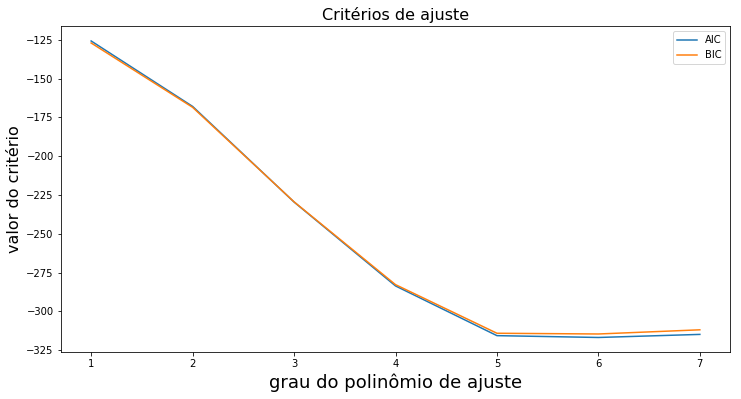

In [29]:
plt.figure(figsize=(12,6))
plt.plot(range(1,len(aic)+1),aic, label='AIC')
plt.plot(range(1,len(bic)+1),bic, label='BIC')
plt.legend()
plt.xlabel('grau do polinômio de ajuste', fontsize=18)
plt.ylabel('valor do critério', fontsize=16)
plt.title('Critérios de ajuste', fontsize=16)
plt.show()

### Critério de seleção no ajuste aos dados do P. Steadius

In [30]:
aic_sel = [len(x_sel)*np.log(err_sel[j]) + 2*(j+2) for j in range(J_sel)]
bic_sel = [len(x_sel)*np.log(err_sel[j]) + (j+1)*np.log(len(x_sel)) for j in range(J_sel)]

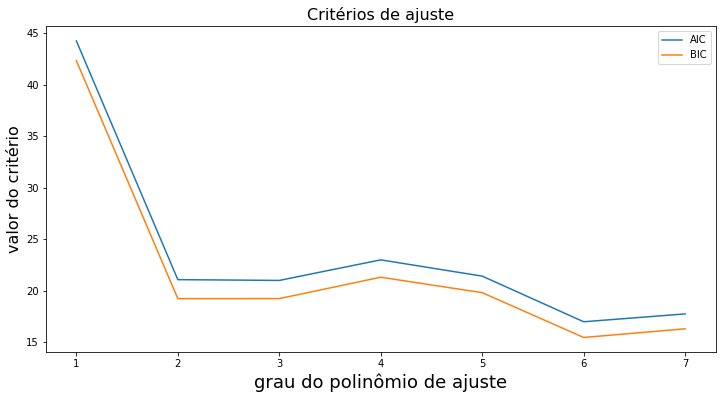

In [31]:
plt.figure(figsize=(12,6))
plt.plot(range(1,len(aic_sel)+1),aic_sel, label='AIC')
plt.plot(range(1,len(bic_sel)+1),bic_sel, label='BIC')
plt.legend()
plt.xlabel('grau do polinômio de ajuste', fontsize=18)
plt.ylabel('valor do critério', fontsize=16)
plt.title('Critérios de ajuste', fontsize=16)
plt.show()

### Ajuste com todos os dados

In [32]:
x, y = df['Prey density'].values, df['P. steadius'].values
J = 8
A = [np.hstack([x**i for i in range(j, -1, -1)]) for j in range(J)]
lsq = [np.linalg.lstsq(A[j], y, rcond=None) for j in range(J)]
a = [lsq[i][0] for i in range(J)]
err = list()
y_ajuste = list()
for j in range(J):
    y_ajuste.append(np.sum([a[j][i]*x**(j-i) for i in range(j+1)], axis=0))
    if lsq[j][1].size>0:
        err.append(lsq[j][1][0]/len(x))
    else:
        err.append(np.linalg.norm(y_ajuste[j] - y)**2/len(x))

### Gráfico dos critérios de ajuste

In [33]:
aic = [len(err)*np.log(err[j]) + 2*(j+2) for j in range(J)]
bic = [len(err)*np.log(err[j]) + (j+1)*np.log(len(err)) for j in range(J)]

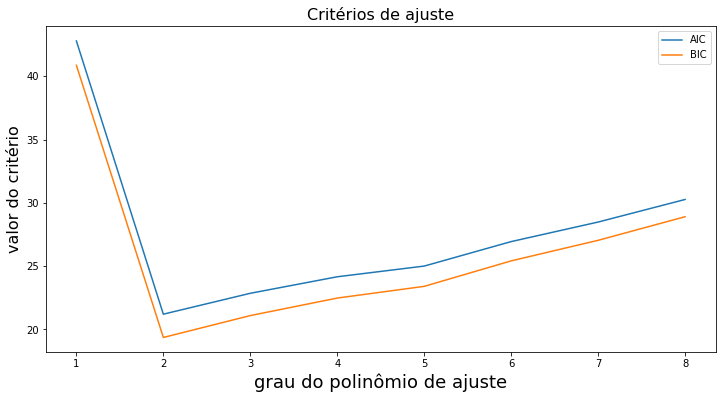

In [34]:
plt.figure(figsize=(12,6))
plt.plot(range(1,len(aic)+1),aic, label='AIC')
plt.plot(range(1,len(bic)+1),bic, label='BIC')
plt.legend()
plt.xlabel('grau do polinômio de ajuste', fontsize=18)
plt.ylabel('valor do critério', fontsize=16)
plt.title('Critérios de ajuste', fontsize=16)
plt.show()

## Exercícios

1. Use os dados de comprimento $\ell$ e período $T$ obtidos dos ensaios de oscilação de pêndulo para ajustar aos dados uma curva da forma $T = C\ell^p$.

1. Em certos processos químicos ou bioquímicos envolvendo catalisadores ou enzimas, da forma $E + S \rightleftharpoons ES \rightarrow E + P$,  a taxa $\nu$ de reação da concentração $S$ de um reagente (substrato) é comumente modelada pela relação (modelo de Michaelis-Menten)
$$ \nu = \frac{\displaystyle \nu_m S}{\displaystyle K_M + S}, 
$$
onde $\nu_m>0$ é a a taxa máxima de reação (associada a uma concentração muito alta do substrato) e $K_M>0$ é um parâmetro de (semi)saturação. Usando os dados do arquivo `reacao_enzimatica_figado_porco.csv`, da ação de uma enzima presente no fígado de porcos, faça um ajuste aos dados com a curva do tipo acima, encontrando valores para $\nu_m$ e $K_M$.

1. O arquivo `evolucao_isotopos_plutonio.csv`, no subdiretório `../dados/ajustes` (que pode ser acessado pela função `path_files_aula6('evolucao_isotopos_plutonio.csv')`, contém uma outra tabela com a evolução das frações de alguns isótopos de Plutônio 241. Use esses dados para fazer o ajuste exponencial e calcular a meia-vida do isótopo 241.

### Continuação dos exercícios

Os exercícios a seguir dizem respeito aos dados do predador *P. speedius* contidos no arquivo `psteadius_pspeedius_vs_prey.csv`.

4. Faça o ajuste polinomial com polinômios de diversos graus.

1. Faça o ajuste por curvas dos tipos $y=Ae^{kx}$, $y=Ax^p$ e $y=\frac{\displaystyle ax}{\displaystyle b + x}$.

1. Aplique os critérios de informação AIC e BIC a todos esses ajustes, indicando qual seria mais indicado.

---

### Apresentação em slides

Para visualizar na forma de slides, abrir um "terminal" *bash* e usar a linha de comando
```bash
jupyter nbconvert 06.00-Aula6.ipynb --to slides --post serve
```

Se quiser adicionar a possibilidade de rolar a página, caso algum *slide* seja muito longo, incluir a opção
```bash
--SlidesExporter.reveal_scroll=True
```

Para usar um tema diferente do padrão, temos a configuração via `SlidesExporter.reveal_theme`. Os temas disponíveis são `beige`, `black`, `blood`, `league`, `moon`, `night`, `serif`, `simple`, `sky`, `solarized`, `white`. O padrão é `white`. Um tema interessante é
```bash
--SlidesExporter.reveal_theme=solarized
```

Para usar um efeito de transição diferente do padrão, temos a configuração via `SlidesExporter.reveal_transition`. As opções são `none`, `fade`, `slide`, `convex`, `concave` e `zoom`. O padrão é `slide`. Uma transição interessante é 
```bash
--SlidesExporter.reveal_transition=convex
```

Mais informações sobre o `nbconvert` em [Configuration options (for nbconvert)](https://nbconvert.readthedocs.io/en/latest/config_options.html) e [Present Your Data Science Projects with Jupyter Notebook Slides!](https://medium.com/learning-machine-learning/present-your-data-science-projects-with-jupyter-slides-75f20735eb0f)

In [ ]:
!jupyter nbconvert 06.00-Aula6.ipynb --to slides --SlidesExporter.reveal_scroll=True

<!--NAVIGATOR-->

---
[<- Aula 5: Incerteza e intervalos e graus de confiança](05.00-Aula5.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Aula 7: Otimização e regressão não-linear ->](07.00-Aula7.ipynb)

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/master/aulas/06.00-Aula6.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/master?filepath=aulas/06.00-Aula6.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>

<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/master/aulas/06.00-Aula6.slides.html"><img align="left" src="https://rmsrosa.github.io/jupyterbookmaker/badges/slides_badge.svg" alt="Open slides" title="Open and View Slides"></a>
&nbsp;